In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import *


In [307]:
df1 = pd.read_csv('data_1372.csv')
df2 = pd.read_csv('data_1394.csv')
df3 = pd.read_csv('data_1397.csv')
df4 = pd.read_csv('data_1400.csv')
df5 = pd.read_csv('data_1474.csv') 
df6 = pd.read_csv('data_1476.csv') 
df7 = pd.read_csv('data_1491.csv')   
df = df1.append(df2)
df = df.append(df3)
df = df.append(df4)
df = df.append(df5)
df = df.append(df6)
df = df.append(df7)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

C:\Users\nunni\AppData\Local\Temp\ipykernel_952\3171547631.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)
C:\Users\nunni\AppData\Local\Temp\ipykernel_952\3171547631.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df3)
C:\Users\nunni\AppData\Local\Temp\ipykernel_952\3171547631.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df4)
C:\Users\nunni\AppData\Local\Temp\ipykernel_952\3171547631.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df5)
C:\Users\nunni\AppData\Local\Temp\ipykernel_952\3171547631.py:12: FutureWarning: The frame.append method is deprecate

,A,B,C,D,E,F
0,1.235291,-1.134355,1.093103,-0.005897,-0.107156,0.186237
1,-0.024436,0.006688,2.043630,0.079189,0.114786,0.492908
2,6.275028,-0.860554,2.998722,1.724061,1.331363,2.749730
3,2.915105,0.495306,-0.022185,-0.386030,0.776131,1.625773
4,-1.490919,-1.391907,2.958764,-0.100572,-1.006085,3.835835
...,...,...,...,...,...,...
295,0.933037,-1.476088,-1.071478,-0.330566,0.850495,3.949351
296,-1.131597,-0.562131,1.889266,0.478599,1.313841,3.865415
297,-0.622347,2.274676,-0.668943,0.566052,0.911822,2.308887
298,1.437506,0.397651,1.501779,1.067500,1.120660,2.122005


          A         B         C         D         E         F
A  1.000000 -0.357169 -0.055974  0.065736  0.128204 -0.541377
B -0.357169  1.000000  0.444939 -0.016961 -0.063742  0.162971
C -0.055974  0.444939  1.000000 -0.007346 -0.026043  0.039684
D  0.065736 -0.016961 -0.007346  1.000000  0.030545 -0.023829
E  0.128204 -0.063742 -0.026043  0.030545  1.000000 -0.041942
F -0.541377  0.162971  0.039684 -0.023829 -0.041942  1.000000


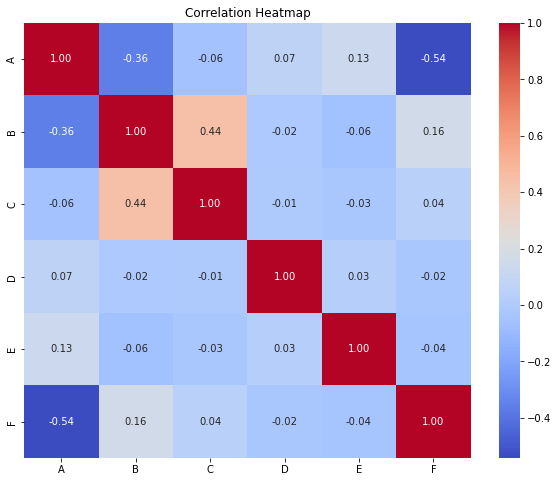

In [303]:
correlation_matrix = df.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

Mutual Information between A and B: 0.2720631855944667
Mutual Information between xn and yn1: 0.46805215642571063


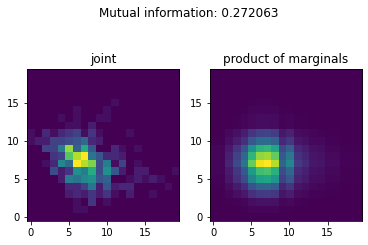

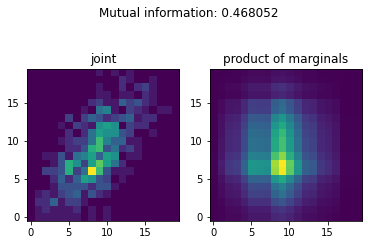

In [304]:
def MI(x, y, Nbins=21):
    bins = np.linspace(np.min(x), np.max(x), Nbins)
    eps = np.spacing(1)
    x_marginal = np.histogram(x, bins=bins)[0]
    x_marginal = x_marginal / x_marginal.sum()
    y_marginal = np.histogram(y, bins=bins)[0]
    y_marginal = y_marginal / y_marginal.sum()
    xy_joint = np.histogram2d(x, y, bins=(bins, bins))[0]
    xy_joint = xy_joint / xy_joint.sum()

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(xy_joint.T, origin='lower')
    plt.title('joint')
    plt.subplot(1, 2, 2)
    plt.imshow((x_marginal[:, None] * y_marginal[None, :]).T, origin='lower')
    plt.title('product of marginals')
    MI_value = np.sum(xy_joint * np.log(xy_joint / (x_marginal[:, None] * y_marginal[None, :] + eps) + eps))
    plt.suptitle('Mutual information: %f' % MI_value)
    return MI_value

# Assuming df is your DataFrame with columns A, B, C, D, E, F
x = df['A']
y = df['B']
MI_value = MI(x, y)
print("Mutual Information between A and B:", MI_value)

# Example with random data
xn = np.random.randn(len(x))
yn = np.random.randn(len(x))
yn1 = xn + yn
MI_value_random = MI(xn, yn1)
print("Mutual Information between xn and yn1:", MI_value_random)

A virker central - har høj correlation med alle undtagen C

Intervention: A = 1

In [305]:
df_A = pd.read_csv('data_1403.csv')
df_A1 = pd.read_csv('data_1477.csv')
df_A2 = pd.read_csv('data_1492.csv')
df_A = df_A.append(df_A1)
df_A = df_A.append(df_A2)
df_A.drop('Unnamed: 0', axis=1, inplace=True)
df_A

C:\Users\nunni\AppData\Local\Temp\ipykernel_952\4195852226.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_A = df_A.append(df_A1)
C:\Users\nunni\AppData\Local\Temp\ipykernel_952\4195852226.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_A = df_A.append(df_A2)


,A,B,C,D,E,F
0,1.0,0.924515,3.096279,-0.013630,-0.284283,-0.498608
1,1.0,-1.182831,0.228595,-0.112492,-0.268401,1.691730
2,1.0,0.828006,2.395470,-0.089796,0.055045,1.493439
3,1.0,-1.238862,2.815715,0.100369,-1.045953,1.650546
4,1.0,-0.689955,-0.466644,-0.334354,0.108129,-0.532227
...,...,...,...,...,...,...
295,1.0,-0.164194,2.881242,-0.733959,-0.876390,2.984202
296,1.0,0.988615,2.865188,-0.799882,-1.043926,2.041650
297,1.0,-2.980741,-0.434494,1.162010,0.973672,2.461631
298,1.0,3.452224,2.689802,0.226232,0.208071,0.714221


    A         B         C         D         E         F
A NaN       NaN       NaN       NaN       NaN       NaN
B NaN  1.000000  0.516751  0.063583  0.027202  0.048813
C NaN  0.516751  1.000000 -0.007594  0.008020  0.033847
D NaN  0.063583 -0.007594  1.000000 -0.008896 -0.042946
E NaN  0.027202  0.008020 -0.008896  1.000000  0.059346
F NaN  0.048813  0.033847 -0.042946  0.059346  1.000000


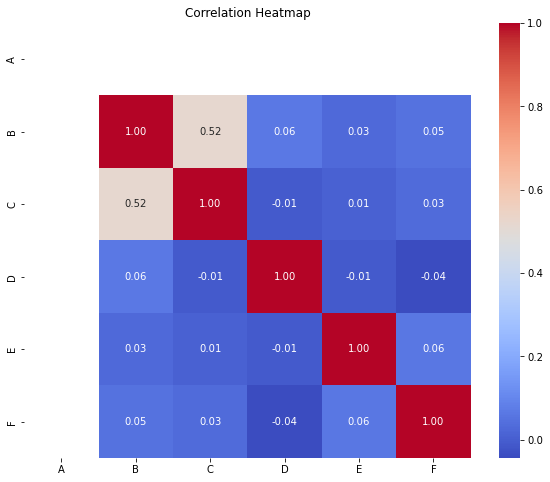

In [306]:
correlation_matrix_A = df_A.corr()

print(correlation_matrix_A)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_A, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

D = 1

In [211]:
df_D = pd.read_csv('data_1406.csv')
df_D1 = pd.read_csv('data_1480.csv')
df_D2 = pd.read_csv('data_1495.csv')
df_D = df_D.append(df_D1)
df_D = df_D.append(df_D2)
df_D.drop('Unnamed: 0', axis=1, inplace=True)
df_D

C:\Users\nunni\AppData\Local\Temp\ipykernel_952\441757727.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_D = df_D.append(df_D1)
C:\Users\nunni\AppData\Local\Temp\ipykernel_952\441757727.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_D = df_D.append(df_D2)


,A,B,C,D,E,F
0,3.000220,-1.002863,0.980499,1.0,-0.086888,1.099187
1,-1.214600,0.259471,-0.044627,1.0,-1.072792,3.226051
2,1.156434,1.235495,2.976434,1.0,1.016944,1.479551
3,-0.397970,0.287625,3.010966,1.0,-0.873716,3.243828
4,0.997328,1.730349,2.804522,1.0,0.728179,1.199116
...,...,...,...,...,...,...
295,-3.593942,1.577752,1.853903,1.0,1.555771,5.952674
296,3.434827,0.443199,2.446371,1.0,0.004791,1.633729
297,6.444469,-0.901677,3.160459,1.0,-0.945010,1.481013
298,0.201735,1.525669,2.056699,1.0,0.130526,3.360071


          A         B         C   D         E         F
A  1.000000 -0.296866 -0.092954 NaN -0.004340 -0.710323
B -0.296866  1.000000  0.463552 NaN  0.026557  0.269752
C -0.092954  0.463552  1.000000 NaN  0.062035  0.071286
D       NaN       NaN       NaN NaN       NaN       NaN
E -0.004340  0.026557  0.062035 NaN  1.000000  0.043985
F -0.710323  0.269752  0.071286 NaN  0.043985  1.000000


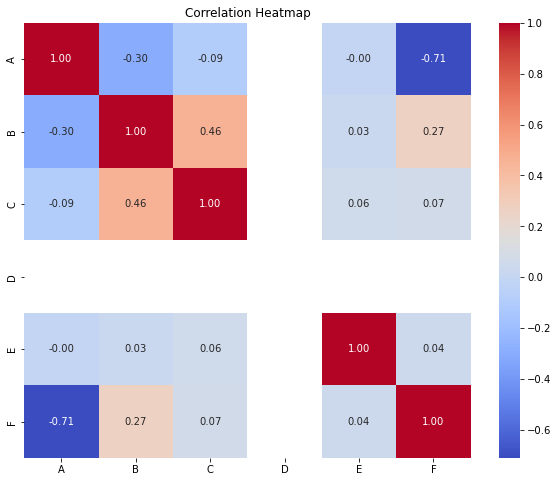

In [212]:
correlation_matrix_D = df_D.corr()

print(correlation_matrix_D)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_D, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

Når D = 1, så er A og B correlerede, B og C er correlede, A og F er correlede og B og F er correlerede 

F = 1

In [214]:
df_F = pd.read_csv('data_1407.csv')
df_F1 = pd.read_csv('data_1482.csv')
df_F2 = pd.read_csv('data_1497.csv')
df_F = df_F.append(df_F1)
df_F = df_F.append(df_F2)
df_F.drop('Unnamed: 0', axis=1, inplace=True)
df_F

C:\Users\nunni\AppData\Local\Temp\ipykernel_952\4070674945.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_F = df_F.append(df_F1)
C:\Users\nunni\AppData\Local\Temp\ipykernel_952\4070674945.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_F = df_F.append(df_F2)


,A,B,C,D,E,F
0,1.526784,1.492519,2.908506,0.740211,-0.866081,1.0
1,4.243893,-2.951891,2.731560,-2.157533,1.247871,1.0
2,-0.565053,-1.168048,-1.124283,-0.067510,-0.205328,1.0
3,0.785427,0.133641,1.829099,0.045711,-0.047005,1.0
4,1.716037,1.686283,3.973878,-1.249818,-1.185936,1.0
...,...,...,...,...,...,...
295,4.800622,-3.263241,-0.864357,-0.022797,-0.288125,1.0
296,0.707892,0.839477,0.715798,-0.283902,-0.833759,1.0
297,1.375554,1.222951,3.205172,-0.457387,-0.919223,1.0
298,1.360603,-2.001537,-0.321638,0.685829,-0.982589,1.0


          A         B         C         D         E   F
A  1.000000 -0.278274  0.015163 -0.063472  0.032633 NaN
B -0.278274  1.000000  0.428674  0.013598 -0.040787 NaN
C  0.015163  0.428674  1.000000  0.071664 -0.073562 NaN
D -0.063472  0.013598  0.071664  1.000000  0.007208 NaN
E  0.032633 -0.040787 -0.073562  0.007208  1.000000 NaN
F       NaN       NaN       NaN       NaN       NaN NaN


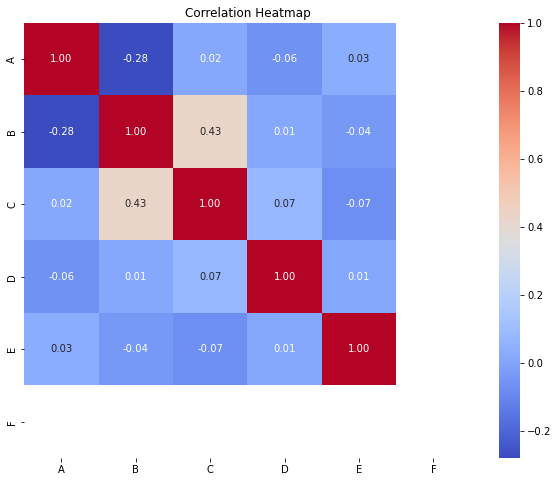

In [215]:
correlation_matrix_F = df_F.corr()

print(correlation_matrix_F)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_F, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

B = 1

In [216]:
df_B = pd.read_csv('data_1412.csv')
df_B1 = pd.read_csv('data_1478.csv')
df_B2 = pd.read_csv('data_1493.csv')
df_B = df_B.append(df_B1)
df_B = df_B.append(df_B2)
df_B.drop('Unnamed: 0', axis=1, inplace=True)
df_B

C:\Users\nunni\AppData\Local\Temp\ipykernel_952\1983589566.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_B = df_B.append(df_B1)
C:\Users\nunni\AppData\Local\Temp\ipykernel_952\1983589566.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_B = df_B.append(df_B2)


,A,B,C,D,E,F
0,-1.587196,1.0,2.656747,-0.326987,1.257080,4.315013
1,1.644088,1.0,-0.352483,0.864324,0.848989,1.506807
2,0.625930,1.0,0.782362,-1.041457,-0.917211,2.946557
3,-0.995705,1.0,0.413379,0.043643,1.008178,1.327968
4,5.202908,1.0,2.898339,-0.445085,-1.067858,2.808265
...,...,...,...,...,...,...
295,1.185183,1.0,-0.171427,-0.457662,0.679856,1.380602
296,-0.561648,1.0,-0.264470,0.324807,-0.250006,2.187855
297,-0.164583,1.0,2.658028,-0.183424,0.707495,0.757369
298,-0.303481,1.0,2.458231,-1.062710,-1.200828,2.605876


          A   B         C         D         E         F
A  1.000000 NaN -0.041882 -0.020194  0.089208 -0.373861
B       NaN NaN       NaN       NaN       NaN       NaN
C -0.041882 NaN  1.000000  0.014936 -0.019153  0.112581
D -0.020194 NaN  0.014936  1.000000  0.047840 -0.024294
E  0.089208 NaN -0.019153  0.047840  1.000000 -0.054660
F -0.373861 NaN  0.112581 -0.024294 -0.054660  1.000000


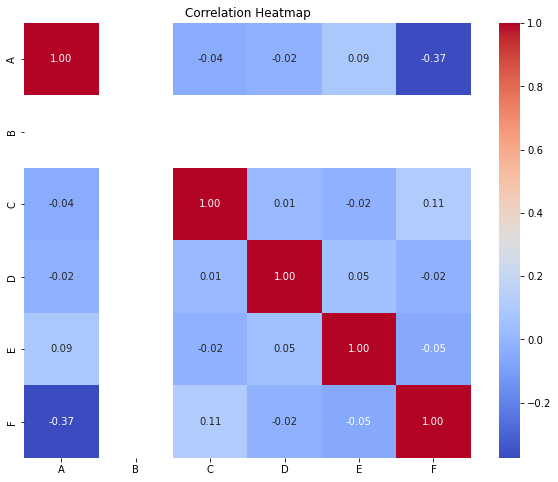

In [217]:
correlation_matrix_B = df_B.corr()

print(correlation_matrix_B)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_B, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [218]:
df_C = pd.read_csv('data_1458.csv')
df_C1 = pd.read_csv('data_1479.csv')
df_C2 = pd.read_csv('data_1494.csv')
df_C = df_C.append(df_C1)
df_C = df_C.append(df_C2)
df_C.drop('Unnamed: 0', axis=1, inplace=True)
df_C

C:\Users\nunni\AppData\Local\Temp\ipykernel_952\2214085469.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_C = df_C.append(df_C1)
C:\Users\nunni\AppData\Local\Temp\ipykernel_952\2214085469.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_C = df_C.append(df_C2)


,A,B,C,D,E,F
0,5.559707,-1.526179,1.0,0.163805,0.183761,-1.083184
1,0.173775,0.636643,1.0,0.017470,1.075254,2.709725
2,1.611626,-0.661706,1.0,-0.823036,0.799621,1.589137
3,4.061508,-2.272643,1.0,0.085153,0.143421,-0.692938
4,-1.525125,0.866128,1.0,-0.287368,0.045313,2.147436
...,...,...,...,...,...,...
295,0.469713,-0.589086,1.0,-0.078816,-0.184642,-0.070663
296,-0.252111,-1.279575,1.0,0.107676,-0.041475,2.168186
297,4.115467,-0.400985,1.0,1.395105,0.994168,1.934971
298,-0.867770,-1.445801,1.0,0.055390,-0.892048,2.851338


          A         B   C         D         E         F
A  1.000000 -0.297387 NaN  0.031497  0.059927 -0.439786
B -0.297387  1.000000 NaN  0.052045 -0.025214  0.140996
C       NaN       NaN NaN       NaN       NaN       NaN
D  0.031497  0.052045 NaN  1.000000  0.047970 -0.010925
E  0.059927 -0.025214 NaN  0.047970  1.000000  0.039820
F -0.439786  0.140996 NaN -0.010925  0.039820  1.000000


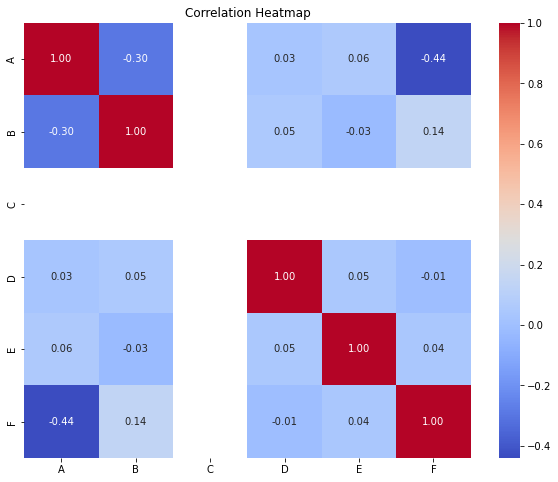

In [219]:
correlation_matrix_C = df_C.corr()

print(correlation_matrix_C)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_C, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [220]:
df_E = pd.read_csv('data_1459.csv')
df_E1 = pd.read_csv('data_1481.csv')
df_E2 = pd.read_csv('data_1496.csv')
df_E = df_E.append(df_E1)
df_E = df_E.append(df_E2)
df_E.drop('Unnamed: 0', axis=1, inplace=True)
df_E

C:\Users\nunni\AppData\Local\Temp\ipykernel_952\1165537165.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_E = df_E.append(df_E1)
C:\Users\nunni\AppData\Local\Temp\ipykernel_952\1165537165.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_E = df_E.append(df_E2)


,A,B,C,D,E,F
0,1.512759,-2.365493,3.028782,-1.825683,1.0,3.200317
1,2.874377,-0.505350,1.831159,-0.890920,1.0,1.438190
2,-1.606676,0.458229,0.744600,-0.479178,1.0,3.079436
3,-1.129626,0.026494,3.145391,0.235875,1.0,2.583278
4,1.170554,1.997316,2.629312,0.141918,1.0,3.472249
...,...,...,...,...,...,...
295,0.339584,-0.660784,0.659834,-0.833043,1.0,2.020449
296,-2.306187,-1.878298,0.719268,-0.283978,1.0,4.019213
297,1.272263,0.357543,3.089726,2.236251,1.0,3.437888
298,1.059235,0.045827,2.043943,-0.511832,1.0,0.576285


          A         B         C         D   E         F
A  1.000000 -0.299214  0.005550  0.094354 NaN -0.472515
B -0.299214  1.000000  0.456654 -0.045898 NaN  0.130391
C  0.005550  0.456654  1.000000  0.031815 NaN -0.025045
D  0.094354 -0.045898  0.031815  1.000000 NaN -0.024703
E       NaN       NaN       NaN       NaN NaN       NaN
F -0.472515  0.130391 -0.025045 -0.024703 NaN  1.000000


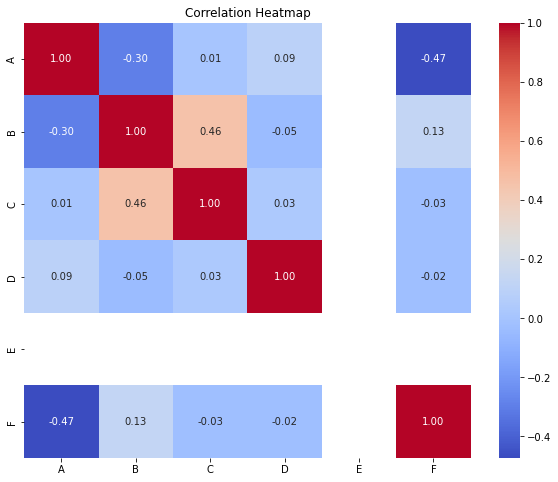

In [221]:
correlation_matrix_E = df_E.corr()

print(correlation_matrix_E)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_E, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [222]:
df_DminusF = pd.read_csv('data_1466.csv')
df_DminusF.drop('Unnamed: 0', axis=1, inplace=True)
df_DminusF

,A,B,C,D,E,F
0,2.114780,1.165153,2.873889,-1.0,1.492018,1.0
1,1.990871,-2.587674,1.131346,-1.0,0.083305,1.0
2,2.122048,1.510539,3.683755,-1.0,-0.997998,1.0
3,3.955518,-0.967991,2.606943,-1.0,1.223190,1.0
4,1.910396,-0.052663,2.744349,-1.0,-0.669100,1.0
...,...,...,...,...,...,...
95,1.992341,1.074240,1.507698,-1.0,0.929947,1.0
96,2.040540,-0.081458,2.561910,-1.0,0.855429,1.0
97,1.607213,-0.644520,3.181355,-1.0,-1.260398,1.0
98,2.681678,0.035062,2.360530,-1.0,0.998685,1.0


In [223]:
df_DF = pd.read_csv('data_1467.csv')
df_DF.drop('Unnamed: 0', axis=1, inplace=True)
df_DF

,A,B,C,D,E,F
0,3.040254,-1.360622,1.362274,1.0,0.153009,1.0
1,3.077103,1.255561,0.929316,1.0,-0.898873,1.0
2,2.361398,5.889313,2.764003,1.0,1.274724,1.0
3,2.941626,-0.903547,-1.277315,1.0,-1.102596,1.0
4,2.110954,-4.619523,1.279858,1.0,-1.398524,1.0
...,...,...,...,...,...,...
95,3.813531,0.059061,2.472549,1.0,0.150433,1.0
96,1.238642,0.870049,3.118737,1.0,0.719687,1.0
97,1.687526,-0.493384,3.332728,1.0,1.115946,1.0
98,2.163237,-0.498598,2.570841,1.0,1.111145,1.0


In [224]:
# make a table of the mean of each column for each df_* 
table_mean = pd.concat([df.mean(), df_A.mean(), df_B.mean(), df_C.mean(), df_D.mean(), df_E.mean(), df_F.mean(), df_DF.mean(), df_DminusF.mean()], axis=1)
table_mean.columns = ['df', 'df_A', 'df_B', 'df_C', 'df_D', 'df_E', 'df_F','df_DF', 'df_DminusF']
table_mean

,df,df_A,df_B,df_C,df_D,df_E,df_F,df_DF,df_DminusF
A,0.333430,1.000000,0.436275,0.364709,1.386149,0.331449,1.370007,2.404831,2.583010
B,0.368820,0.049522,1.000000,0.184704,-0.097838,0.304793,-0.035865,-0.456154,-0.276572
C,1.742751,1.851214,1.596761,1.000000,1.709051,1.578205,1.717962,1.813632,1.767273
D,-0.010298,0.016284,-0.023957,-0.034010,1.000000,-0.008116,-0.022168,1.000000,-1.000000
E,0.018991,0.009870,0.038794,0.028987,-0.010492,1.000000,0.046992,-0.176684,0.033086
F,2.064713,2.008760,2.065352,2.140310,2.068124,2.486223,1.000000,1.000000,1.000000


In [225]:
from scipy.stats import ttest_ind

In [226]:
ttest_AA = ttest_ind(df['A'], df_A['A']) # significant
ttest_BA = ttest_ind(df['B'], df_A['B']) # significant
ttest_CA = ttest_ind(df['C'], df_A['C']) # not significant
ttest_DA = ttest_ind(df['D'], df_A['D']) # not significant
ttest_EA = ttest_ind(df['E'], df_A['E']) # not significant
ttest_FA = ttest_ind(df['F'], df_A['F']) # not significant

ttest_AA, ttest_BA, ttest_CA, ttest_DA, ttest_EA, ttest_FA

c:\Users\nunni\anaconda3\lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


(TtestResult(statistic=-7.780738898800755, pvalue=1.5486503966753066e-14, df=1198.0),
 TtestResult(statistic=3.2739232250211066, pvalue=0.0010909581548173715, df=1198.0),
 TtestResult(statistic=-1.4247550139850573, pvalue=0.15448847669210408, df=1198.0),
 TtestResult(statistic=-0.707834135472802, pvalue=0.479185947580799, df=1198.0),
 TtestResult(statistic=0.18950734795544996, pvalue=0.8497272982802916, df=1198.0),
 TtestResult(statistic=0.7201524345097964, pvalue=0.471571624824206, df=1198.0))

In [227]:
ttest_AB = ttest_ind(df['A'], df_B['A']) # not significant 
ttest_BB = ttest_ind(df['B'], df_B['B']) # significant
ttest_CB = ttest_ind(df['C'], df_B['C']) # significant
ttest_DB = ttest_ind(df['D'], df_B['D']) # not significant
ttest_EB = ttest_ind(df['E'], df_B['E']) # not significant
ttest_FB = ttest_ind(df['F'], df_B['F']) # not significant

ttest_AB, ttest_BB, ttest_CB, ttest_DB, ttest_EB, ttest_FB

(TtestResult(statistic=-0.8923312374244665, pvalue=0.37239461222952686, df=1198.0),
 TtestResult(statistic=-9.208668592033955, pvalue=1.4323224266594742e-19, df=1198.0),
 TtestResult(statistic=1.8309963119509192, pvalue=0.06734935437899602, df=1198.0),
 TtestResult(statistic=0.35020659247767405, pvalue=0.7262452209102948, df=1198.0),
 TtestResult(statistic=-0.409990785538871, pvalue=0.6818860099353334, df=1198.0),
 TtestResult(statistic=-0.008547287690408061, pvalue=0.993181757207841, df=1198.0))

In [228]:
ttest_AC = ttest_ind(df['A'], df_C['A']) # not significant
ttest_BC = ttest_ind(df['B'], df_C['B']) # not significant
ttest_CC = ttest_ind(df['C'], df_C['C']) # significant
ttest_DC = ttest_ind(df['D'], df_C['D']) # not significant
ttest_EC = ttest_ind(df['E'], df_C['E']) # not significant
ttest_FC = ttest_ind(df['F'], df_C['F']) # not significant

ttest_AC, ttest_BC, ttest_CC, ttest_DC, ttest_EC, ttest_FC

(TtestResult(statistic=-0.27134387605577015, pvalue=0.786173311356646, df=1198.0),
 TtestResult(statistic=1.8747232076786002, pvalue=0.0610739616309531, df=1198.0),
 TtestResult(statistic=13.874474391973783, pvalue=1.0611599472504951e-40, df=1198.0),
 TtestResult(statistic=0.5972638211386818, pvalue=0.5504441196907434, df=1198.0),
 TtestResult(statistic=-0.20348382489741929, pvalue=0.8387914440187116, df=1198.0),
 TtestResult(statistic=-0.9776430051611301, pvalue=0.32844829343324844, df=1198.0))

In [229]:
ttest_AD = ttest_ind(df['A'], df_D['A']) # significant
ttest_BD = ttest_ind(df['B'], df_D['B']) # significant
ttest_CD = ttest_ind(df['C'], df_D['C']) # significant
ttest_DD = ttest_ind(df['D'], df_D['D']) # significant 
ttest_ED = ttest_ind(df['E'], df_D['E']) # not significant
ttest_FD = ttest_ind(df['F'], df_D['F']) # not significant

ttest_AD, ttest_BD, ttest_CD, ttest_DD, ttest_ED, ttest_FD

(TtestResult(statistic=-8.906630993881658, pvalue=1.910806619989591e-18, df=1198.0),
 TtestResult(statistic=4.81852145926952, pvalue=1.6314799084712683e-06, df=1198.0),
 TtestResult(statistic=0.4311820608873706, pvalue=0.6664135702639988, df=1198.0),
 TtestResult(statistic=-38.729187379467874, pvalue=1.977630550177801e-213, df=1198.0),
 TtestResult(statistic=0.6015308998470131, pvalue=0.5476002453203616, df=1198.0),
 TtestResult(statistic=-0.042532508880566866, pvalue=0.966081284316134, df=1198.0))

In [230]:
ttest_AE = ttest_ind(df['A'], df_E['A']) # not significant
ttest_BE = ttest_ind(df['B'], df_E['B']) # not significant
ttest_CE = ttest_ind(df['C'], df_E['C']) # significant
ttest_DE = ttest_ind(df['D'], df_E['D']) # not significant
ttest_EE = ttest_ind(df['E'], df_E['E']) # significant
ttest_FE = ttest_ind(df['F'], df_E['F']) # significant

ttest_AE, ttest_BE, ttest_CE, ttest_DE, ttest_EE, ttest_FE

(TtestResult(statistic=0.016240234748887507, pvalue=0.9870454411311327, df=1198.0),
 TtestResult(statistic=0.6477412018512843, pvalue=0.5172764610793413, df=1198.0),
 TtestResult(statistic=2.0700176956582097, pvalue=0.03866458536723022, df=1198.0),
 TtestResult(statistic=-0.04866194878612076, pvalue=0.9611968115101659, df=1198.0),
 TtestResult(statistic=-28.55822249265307, pvalue=3.0035665363016437e-137, df=1198.0),
 TtestResult(statistic=-6.0690844813704805, pvalue=1.7233671996824788e-09, df=1198.0))

In [231]:
ttest_AF = ttest_ind(df['A'], df_F['A']) # significant
ttest_BF = ttest_ind(df['B'], df_F['B']) # significant
ttest_CF = ttest_ind(df['C'], df_F['C']) # not significant
ttest_DF = ttest_ind(df['D'], df_F['D']) # not significant
ttest_EF = ttest_ind(df['E'], df_F['E']) # not significant
ttest_FF = ttest_ind(df['F'], df_F['F']) # significant

ttest_AF, ttest_BF, ttest_CF, ttest_DF, ttest_EF, ttest_FF

(TtestResult(statistic=-9.479097845673593, pvalue=1.3235886003285949e-20, df=1198.0),
 TtestResult(statistic=4.247332853038562, pvalue=2.330784059450463e-05, df=1198.0),
 TtestResult(statistic=0.32414002134073644, pvalue=0.7458886107887734, df=1198.0),
 TtestResult(statistic=0.3146277928371424, pvalue=0.7530990604840373, df=1198.0),
 TtestResult(statistic=-0.576632766723911, pvalue=0.5642958843070741, df=1198.0),
 TtestResult(statistic=19.13554207912944, pvalue=1.9790823856556955e-71, df=1198.0))

In [232]:
ttest_DFA = ttest_ind(df['A'], df_DF['A']) # significant
ttest_DFB = ttest_ind(df['B'], df_DF['B']) # significant
ttest_DFC = ttest_ind(df['C'], df_DF['C']) # significant
ttest_DFE = ttest_ind(df['E'], df_DF['E']) # significant

ttest_DFA, ttest_DFB, ttest_DFC, ttest_DFE

(TtestResult(statistic=-9.53297753865802, pvalue=2.475502886341673e-20, df=698.0),
 TtestResult(statistic=4.544732986740578, pvalue=6.481884005138935e-06, df=698.0),
 TtestResult(statistic=-0.4926799513824622, pvalue=0.6223936855768473, df=698.0),
 TtestResult(statistic=2.158735072647174, pvalue=0.031210888411563616, df=698.0))

In [233]:
ttest_D_FA = ttest_ind(df['A'], df_DminusF['A']) # significant
ttest_D_FB = ttest_ind(df['B'], df_DminusF['B']) # significant
ttest_D_FC = ttest_ind(df['C'], df_DminusF['C']) # significant
ttest_D_FE = ttest_ind(df['E'], df_DminusF['E']) # not significant

ttest_D_FA, ttest_D_FB, ttest_D_FC, ttest_D_FE

(TtestResult(statistic=-10.355648789876383, pvalue=1.7839941816334366e-23, df=698.0),
 TtestResult(statistic=3.5736846722909967, pvalue=0.000376220650258698, df=698.0),
 TtestResult(statistic=-0.1686405950465128, pvalue=0.8661282027820267, df=698.0),
 TtestResult(statistic=-0.15506528432044797, pvalue=0.8768146790630573, df=698.0))

In [234]:
# make a table containing all the pvalues from the t-test results
table_ttest = pd.DataFrame({'A': [ttest_AA.pvalue, ttest_AB.pvalue, ttest_AC.pvalue, ttest_AD.pvalue, ttest_AE.pvalue, ttest_AF.pvalue],
                            'B': [ttest_BA.pvalue, ttest_BB.pvalue, ttest_BC.pvalue, ttest_BD.pvalue, ttest_BE.pvalue, ttest_BF.pvalue],
                            'C': [ttest_CA.pvalue, ttest_CB.pvalue, ttest_CC.pvalue, ttest_CD.pvalue, ttest_CE.pvalue, ttest_CF.pvalue],
                            'D': [ttest_DA.pvalue, ttest_DB.pvalue, ttest_DC.pvalue, ttest_DD.pvalue, ttest_DE.pvalue, ttest_DF.pvalue],
                            'E': [ttest_EA.pvalue, ttest_EB.pvalue, ttest_EC.pvalue, ttest_ED.pvalue, ttest_EE.pvalue, ttest_EF.pvalue],
                            'F': [ttest_FA.pvalue, ttest_FB.pvalue, ttest_FC.pvalue, ttest_FD.pvalue, ttest_FE.pvalue, ttest_FF.pvalue],},
                           index=['A = 1', 'B = 1', 'C = 1', 'D = 1', 'E = 1', 'F = 1'])

#only show values with 3 decimal places
table_ttest = table_ttest.round(3)
table_ttest

,A,B,C,D,E,F
A = 1,0.000,0.001,0.154,0.479,0.850,0.472
B = 1,0.372,0.000,0.067,0.726,0.682,0.993
C = 1,0.786,0.061,0.000,0.550,0.839,0.328
D = 1,0.000,0.000,0.666,0.000,0.548,0.966
E = 1,0.987,0.517,0.039,0.961,0.000,0.000
F = 1,0.000,0.000,0.746,0.753,0.564,0.000


In [235]:
# A ændrer sig mærkant når F sættes til 1, men F ændrer sig ikke mærkbart når A sættes til 1
# B ændrer sig mærkant når både D og F sættes til 1, hverken D eller F ændrer sig mærkbart når B sættes til 1
# C ændrer sig mærkant når både B, D og F sættes til 1, F ændrer sig når C sættes til 1
# Når E ændres til 1, ændre F sig significant 

In [237]:
df_00001x = pd.read_csv('data_1500.csv')
df_00001x.drop('Unnamed: 0', axis=1, inplace=True)
df_00001x

,A,B,C,D,E,F
0,0.0,0.0,0.0,0.0,1.0,1.809095
1,0.0,0.0,0.0,0.0,1.0,1.997185
2,0.0,0.0,0.0,0.0,1.0,3.145573
3,0.0,0.0,0.0,0.0,1.0,3.206337
4,0.0,0.0,0.0,0.0,1.0,3.079004
...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,1.0,0.955067
196,0.0,0.0,0.0,0.0,1.0,2.504702
197,0.0,0.0,0.0,0.0,1.0,3.107163
198,0.0,0.0,0.0,0.0,1.0,2.343557


In [238]:
ttest_00001x = ttest_ind(df['F'], df_00001x['F']) # significant
ttest_00001x

TtestResult(statistic=-4.9124579580952465, pvalue=1.0914440433448176e-06, df=798.0)

In [239]:
df_x00001 = pd.read_csv('data_1501.csv')
df_x00001.drop('Unnamed: 0', axis=1, inplace=True)
df_x00001

,A,B,C,D,E,F
0,-0.881521,0.0,0.0,0.0,0.0,1.0
1,0.117388,0.0,0.0,0.0,0.0,1.0
2,3.233791,0.0,0.0,0.0,0.0,1.0
3,-0.804981,0.0,0.0,0.0,0.0,1.0
4,0.353813,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
195,0.377637,0.0,0.0,0.0,0.0,1.0
196,-0.409403,0.0,0.0,0.0,0.0,1.0
197,-0.032002,0.0,0.0,0.0,0.0,1.0
198,2.223963,0.0,0.0,0.0,0.0,1.0


In [240]:
ttest_x00001 = ttest_ind(df['A'], df_x00001['A']) # not significant
ttest_x00001

TtestResult(statistic=-1.128641551639443, pvalue=0.2593882604858093, df=798.0)

In [241]:
df_00x010 = pd.read_csv('data_1503.csv')
df_00x010.drop('Unnamed: 0', axis=1, inplace=True)
df_00x010

,A,B,C,D,E,F
0,0.0,0.0,0.416832,0.0,1.0,0.0
1,0.0,0.0,2.441998,0.0,1.0,0.0
2,0.0,0.0,2.289345,0.0,1.0,0.0
3,0.0,0.0,0.077864,0.0,1.0,0.0
4,0.0,0.0,2.506135,0.0,1.0,0.0
...,...,...,...,...,...,...
195,0.0,0.0,2.379571,0.0,1.0,0.0
196,0.0,0.0,2.490879,0.0,1.0,0.0
197,0.0,0.0,0.214087,0.0,1.0,0.0
198,0.0,0.0,-1.008210,0.0,1.0,0.0


In [242]:
ttest_00x010 = ttest_ind(df['C'], df_00x010['C']) # significant
ttest_00x010

TtestResult(statistic=3.0468481923009003, pvalue=0.0023887273091558, df=798.0)

In [243]:
df_0x0001 = pd.read_csv('data_1504.csv')
df_0x0001.drop('Unnamed: 0', axis=1, inplace=True)
df_0x0001

,A,B,C,D,E,F
0,0.0,-1.957080,0.0,0.0,0.0,1.0
1,0.0,-1.407668,0.0,0.0,0.0,1.0
2,0.0,1.674322,0.0,0.0,0.0,1.0
3,0.0,-0.749693,0.0,0.0,0.0,1.0
4,0.0,0.252597,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
195,0.0,-1.406307,0.0,0.0,0.0,1.0
196,0.0,2.121386,0.0,0.0,0.0,1.0
197,0.0,0.802867,0.0,0.0,0.0,1.0
198,0.0,1.151372,0.0,0.0,0.0,1.0


In [244]:
ttest_0x0001 = ttest_ind(df['B'], df_0x0001['B']) # not significant
ttest_0x0001

TtestResult(statistic=-0.6600443120647006, pvalue=0.5094158520167815, df=798.0)

In [245]:
df_0x0100 = pd.read_csv('data_1505.csv')
df_0x0100.drop('Unnamed: 0', axis=1, inplace=True)
df_0x0100

,A,B,C,D,E,F
0,0.0,1.360409,0.0,1.0,0.0,0.0
1,0.0,0.517849,0.0,1.0,0.0,0.0
2,0.0,-2.349303,0.0,1.0,0.0,0.0
3,0.0,1.220281,0.0,1.0,0.0,0.0
4,0.0,1.361831,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
195,0.0,-0.157655,0.0,1.0,0.0,0.0
196,0.0,2.367057,0.0,1.0,0.0,0.0
197,0.0,0.371846,0.0,1.0,0.0,0.0
198,0.0,0.036263,0.0,1.0,0.0,0.0


In [246]:
ttest_0x0100 = ttest_ind(df['B'], df_0x0100['B']) # not significant
ttest_0x0100

TtestResult(statistic=0.7471186780704862, pvalue=0.4552120006654736, df=798.0)

In [247]:
df_x00100 = pd.read_csv('data_1506.csv')
df_x00100.drop('Unnamed: 0', axis=1, inplace=True)
df_x00100

,A,B,C,D,E,F
0,2.585101,0.0,0.0,1.0,0.0,0.0
1,2.099281,0.0,0.0,1.0,0.0,0.0
2,2.567835,0.0,0.0,1.0,0.0,0.0
3,2.301136,0.0,0.0,1.0,0.0,0.0
4,3.283192,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
195,2.193531,0.0,0.0,1.0,0.0,0.0
196,4.479040,0.0,0.0,1.0,0.0,0.0
197,2.522950,0.0,0.0,1.0,0.0,0.0
198,2.202835,0.0,0.0,1.0,0.0,0.0


In [248]:
ttest_x00100 = ttest_ind(df['A'],df_x00100['A']) #significant
ttest_x00100

TtestResult(statistic=-19.213682616893884, pvalue=6.499606307042396e-68, df=798.0)

In [249]:
df_1x0000 = pd.read_csv('data_1507.csv')
df_1x0000.drop('Unnamed: 0', axis=1, inplace=True)
df_1x0000

,A,B,C,D,E,F
0,1.0,-0.999067,0.0,0.0,0.0,0.0
1,1.0,-0.312916,0.0,0.0,0.0,0.0
2,1.0,-0.061250,0.0,0.0,0.0,0.0
3,1.0,0.204651,0.0,0.0,0.0,0.0
4,1.0,-2.155232,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
195,1.0,-3.249403,0.0,0.0,0.0,0.0
196,1.0,-0.511771,0.0,0.0,0.0,0.0
197,1.0,-2.297621,0.0,0.0,0.0,0.0
198,1.0,1.747314,0.0,0.0,0.0,0.0


In [250]:
ttest_1x0000 = ttest_ind(df['B'], df_1x0000['B']) # not significant
ttest_1x0000

TtestResult(statistic=1.3215523106008902, pvalue=0.18669602214766656, df=798.0)

In [251]:
df_10x000 = pd.read_csv('data_1509.csv')
df_10x000.drop('Unnamed: 0', axis=1, inplace=True)
df_10x000

,A,B,C,D,E,F
0,1.0,0.0,3.449368,0.0,0.0,0.0
1,1.0,0.0,-0.683388,0.0,0.0,0.0
2,1.0,0.0,2.173742,0.0,0.0,0.0
3,1.0,0.0,0.405969,0.0,0.0,0.0
4,1.0,0.0,2.361860,0.0,0.0,0.0
...,...,...,...,...,...,...
145,1.0,0.0,3.413415,0.0,0.0,0.0
146,1.0,0.0,2.423080,0.0,0.0,0.0
147,1.0,0.0,0.817996,0.0,0.0,0.0
148,1.0,0.0,1.361159,0.0,0.0,0.0


In [252]:
ttest_10x000 = ttest_ind(df['C'], df_10x000['C']) # not significant
ttest_10x000

TtestResult(statistic=-0.2495382488863349, pvalue=0.8030129678671322, df=748.0)

In [253]:
df_100x00 = pd.read_csv('data_1510.csv')
df_100x00.drop('Unnamed: 0', axis=1, inplace=True)
df_100x00

,A,B,C,D,E,F
0,1.0,0.0,0.0,-0.052197,0.0,0.0
1,1.0,0.0,0.0,-0.105605,0.0,0.0
2,1.0,0.0,0.0,-0.023395,0.0,0.0
3,1.0,0.0,0.0,0.068923,0.0,0.0
4,1.0,0.0,0.0,-0.144904,0.0,0.0
...,...,...,...,...,...,...
145,1.0,0.0,0.0,-0.176651,0.0,0.0
146,1.0,0.0,0.0,0.205693,0.0,0.0
147,1.0,0.0,0.0,0.168435,0.0,0.0
148,1.0,0.0,0.0,-0.004705,0.0,0.0


In [254]:
ttest_100x00 = ttest_ind(df['D'], df_100x00['D']) # not significant
ttest_100x00

TtestResult(statistic=-0.41729389349523943, pvalue=0.6765831951592483, df=748.0)

In [255]:
df_1000x0 = pd.read_csv('data_1511.csv')
df_1000x0.drop('Unnamed: 0', axis=1, inplace=True)
df_1000x0

,A,B,C,D,E,F
0,1.0,0.0,0.0,0.0,0.609071,0.0
1,1.0,0.0,0.0,0.0,0.937567,0.0
2,1.0,0.0,0.0,0.0,-0.065449,0.0
3,1.0,0.0,0.0,0.0,1.068782,0.0
4,1.0,0.0,0.0,0.0,-0.270217,0.0
...,...,...,...,...,...,...
145,1.0,0.0,0.0,0.0,-0.870531,0.0
146,1.0,0.0,0.0,0.0,-1.086172,0.0
147,1.0,0.0,0.0,0.0,-0.694110,0.0
148,1.0,0.0,0.0,0.0,-1.053007,0.0


In [256]:
ttest_1000x0 = ttest_ind(df['E'], df_1000x0['E']) # not significant
ttest_1000x0

TtestResult(statistic=-0.5929771223285447, pvalue=0.5533756965837298, df=748.0)

In [257]:
df_10000x = pd.read_csv('data_1512.csv')
df_10000x.drop('Unnamed: 0', axis=1, inplace=True)
df_10000x

,A,B,C,D,E,F
0,1.0,0.0,0.0,0.0,0.0,2.147081
1,1.0,0.0,0.0,0.0,0.0,0.639417
2,1.0,0.0,0.0,0.0,0.0,2.889784
3,1.0,0.0,0.0,0.0,0.0,-0.186655
4,1.0,0.0,0.0,0.0,0.0,1.192543
...,...,...,...,...,...,...
145,1.0,0.0,0.0,0.0,0.0,1.805497
146,1.0,0.0,0.0,0.0,0.0,2.826515
147,1.0,0.0,0.0,0.0,0.0,2.522446
148,1.0,0.0,0.0,0.0,0.0,1.972214


In [258]:
ttest_10000x = ttest_ind(df['F'], df_10000x['F']) # not significant
ttest_10000x

TtestResult(statistic=9.611743933051445, pvalue=1.0565961810577467e-20, df=748.0)

In [259]:
df_x10000 = pd.read_csv('data_1513.csv')
df_x10000.drop('Unnamed: 0', axis=1, inplace=True)
df_x10000

,A,B,C,D,E,F
0,6.355353,1.0,0.0,0.0,0.0,0.0
1,2.841739,1.0,0.0,0.0,0.0,0.0
2,0.937761,1.0,0.0,0.0,0.0,0.0
3,0.019980,1.0,0.0,0.0,0.0,0.0
4,1.159134,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
145,0.702238,1.0,0.0,0.0,0.0,0.0
146,1.562916,1.0,0.0,0.0,0.0,0.0
147,4.188802,1.0,0.0,0.0,0.0,0.0
148,1.404322,1.0,0.0,0.0,0.0,0.0


In [260]:
ttest_x10000 = ttest_ind(df['A'], df_x10000['A']) # not significant
ttest_x10000

TtestResult(statistic=-6.098414810487811, pvalue=1.716565007892099e-09, df=748.0)

In [261]:
df_01x000 = pd.read_csv('data_1514.csv')
df_01x000.drop('Unnamed: 0', axis=1, inplace=True)
df_01x000

,A,B,C,D,E,F
0,0.0,1.0,2.722143,0.0,0.0,0.0
1,0.0,1.0,1.837126,0.0,0.0,0.0
2,0.0,1.0,2.365063,0.0,0.0,0.0
3,0.0,1.0,1.541579,0.0,0.0,0.0
4,0.0,1.0,0.641240,0.0,0.0,0.0
...,...,...,...,...,...,...
145,0.0,1.0,2.427521,0.0,0.0,0.0
146,0.0,1.0,1.762371,0.0,0.0,0.0
147,0.0,1.0,-1.685805,0.0,0.0,0.0
148,0.0,1.0,1.855974,0.0,0.0,0.0


In [262]:
ttest_01x000 = ttest_ind(df['C'], df_01x000['C']) # not significant
ttest_01x000

TtestResult(statistic=2.1456377404180644, pvalue=0.03222313150810669, df=748.0)

In [263]:
df_010x00 = pd.read_csv('data_1515.csv')
df_010x00.drop('Unnamed: 0', axis=1, inplace=True)
df_010x00

,A,B,C,D,E,F
0,0.0,1.0,0.0,-0.061237,0.0,0.0
1,0.0,1.0,0.0,-0.021599,0.0,0.0
2,0.0,1.0,0.0,0.021196,0.0,0.0
3,0.0,1.0,0.0,-0.186741,0.0,0.0
4,0.0,1.0,0.0,-0.099169,0.0,0.0
...,...,...,...,...,...,...
145,0.0,1.0,0.0,-0.241459,0.0,0.0
146,0.0,1.0,0.0,-0.101073,0.0,0.0
147,0.0,1.0,0.0,0.026139,0.0,0.0
148,0.0,1.0,0.0,0.145802,0.0,0.0


In [264]:
ttest_010x00 = ttest_ind(df['D'], df_01x000['D']) # not significant
ttest_010x00

TtestResult(statistic=-0.1972904029564698, pvalue=0.8436538861652862, df=748.0)

In [265]:
df_0100x0 = pd.read_csv('data_1516.csv')
df_0100x0.drop('Unnamed: 0', axis=1, inplace=True)
df_0100x0

,A,B,C,D,E,F
0,0.0,1.0,0.0,0.0,-0.972420,0.0
1,0.0,1.0,0.0,0.0,1.033270,0.0
2,0.0,1.0,0.0,0.0,0.859057,0.0
3,0.0,1.0,0.0,0.0,-0.983307,0.0
4,0.0,1.0,0.0,0.0,-0.894424,0.0
...,...,...,...,...,...,...
145,0.0,1.0,0.0,0.0,1.205638,0.0
146,0.0,1.0,0.0,0.0,-1.012857,0.0
147,0.0,1.0,0.0,0.0,-0.071319,0.0
148,0.0,1.0,0.0,0.0,-0.156892,0.0


In [266]:
ttest_0100x0 = ttest_ind(df['E'], df_01x000['E']) # not significant
ttest_0100x0

TtestResult(statistic=0.276290598528597, pvalue=0.7824011964569136, df=748.0)

In [267]:
df_01000x = pd.read_csv('data_1517.csv')
df_01000x.drop('Unnamed: 0', axis=1, inplace=True)
df_01000x

,A,B,C,D,E,F
0,0.0,1.0,0.0,0.0,0.0,1.953606
1,0.0,1.0,0.0,0.0,0.0,0.321950
2,0.0,1.0,0.0,0.0,0.0,-0.283518
3,0.0,1.0,0.0,0.0,0.0,0.364240
4,0.0,1.0,0.0,0.0,0.0,0.074849
...,...,...,...,...,...,...
145,0.0,1.0,0.0,0.0,0.0,0.560683
146,0.0,1.0,0.0,0.0,0.0,1.368679
147,0.0,1.0,0.0,0.0,0.0,1.530198
148,0.0,1.0,0.0,0.0,0.0,0.742955


In [268]:
ttest_01000x = ttest_ind(df['F'], df_01x000['F']) # not significant
ttest_01000x

TtestResult(statistic=18.5447235780868, pvalue=1.871820964017524e-63, df=748.0)

In [269]:
df_x01000 = pd.read_csv('data_1518.csv')
df_x01000.drop('Unnamed: 0', axis=1, inplace=True)
df_x01000

,A,B,C,D,E,F
0,1.081336,0.0,1.0,0.0,0.0,0.0
1,5.664824,0.0,1.0,0.0,0.0,0.0
2,0.884648,0.0,1.0,0.0,0.0,0.0
3,0.549556,0.0,1.0,0.0,0.0,0.0
4,1.095844,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
145,2.938856,0.0,1.0,0.0,0.0,0.0
146,2.948969,0.0,1.0,0.0,0.0,0.0
147,0.245316,0.0,1.0,0.0,0.0,0.0
148,0.520398,0.0,1.0,0.0,0.0,0.0


In [270]:
ttest_x01000 = ttest_ind(df['A'], df_01x000['A']) # not significant
ttest_x01000

TtestResult(statistic=1.9450568791439282, pvalue=0.0521425149099136, df=748.0)

In [271]:
df_0x1000 = pd.read_csv('data_1519.csv')
df_0x1000.drop('Unnamed: 0', axis=1, inplace=True)
df_0x1000

,A,B,C,D,E,F
0,0.0,1.310993,1.0,0.0,0.0,0.0
1,0.0,1.351985,1.0,0.0,0.0,0.0
2,0.0,1.890863,1.0,0.0,0.0,0.0
3,0.0,-0.575594,1.0,0.0,0.0,0.0
4,0.0,-0.429629,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
145,0.0,6.404742,1.0,0.0,0.0,0.0
146,0.0,0.531038,1.0,0.0,0.0,0.0
147,0.0,1.492844,1.0,0.0,0.0,0.0
148,0.0,1.671522,1.0,0.0,0.0,0.0


In [272]:
ttest_0x1000 = ttest_ind(df['B'], df_01x000['B']) # not significant
ttest_0x1000

c:\Users\nunni\anaconda3\lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


TtestResult(statistic=-4.602027707763675, pvalue=4.91416267908787e-06, df=748.0)

In [273]:
df_001x00 = pd.read_csv('data_1520.csv')
df_001x00.drop('Unnamed: 0', axis=1, inplace=True)
df_001x00

,A,B,C,D,E,F
0,0.0,0.0,1.0,-0.238225,0.0,0.0
1,0.0,0.0,1.0,-0.025819,0.0,0.0
2,0.0,0.0,1.0,-0.011612,0.0,0.0
3,0.0,0.0,1.0,-0.041238,0.0,0.0
4,0.0,0.0,1.0,0.079007,0.0,0.0
...,...,...,...,...,...,...
145,0.0,0.0,1.0,0.053049,0.0,0.0
146,0.0,0.0,1.0,-0.110002,0.0,0.0
147,0.0,0.0,1.0,-0.154037,0.0,0.0
148,0.0,0.0,1.0,0.063699,0.0,0.0


In [274]:
ttest_001x00 = ttest_ind(df['D'], df_01x000['D']) # not significant
ttest_001x00

TtestResult(statistic=-0.1972904029564698, pvalue=0.8436538861652862, df=748.0)

In [275]:
df_0010x0 = pd.read_csv('data_1521.csv')
df_0010x0.drop('Unnamed: 0', axis=1, inplace=True)
df_0010x0

,A,B,C,D,E,F
0,0.0,0.0,1.0,0.0,0.112902,0.0
1,0.0,0.0,1.0,0.0,-0.105372,0.0
2,0.0,0.0,1.0,0.0,1.201198,0.0
3,0.0,0.0,1.0,0.0,-1.073088,0.0
4,0.0,0.0,1.0,0.0,0.787348,0.0
...,...,...,...,...,...,...
145,0.0,0.0,1.0,0.0,0.113151,0.0
146,0.0,0.0,1.0,0.0,0.730293,0.0
147,0.0,0.0,1.0,0.0,0.152567,0.0
148,0.0,0.0,1.0,0.0,1.414791,0.0


In [276]:
ttest_0010x0 = ttest_ind(df['E'], df_01x000['E']) # not significant
ttest_0010x0

TtestResult(statistic=0.276290598528597, pvalue=0.7824011964569136, df=748.0)

In [277]:
# df_00100x = pd.read_csv('data_1523.csv') MANGLER
# df_00100x.drop('Unnamed: 0', axis=1, inplace=True)
# df_00100x

In [278]:
# ttest_00100x = ttest_ind(df['F'], df_01x000['F']) # not significant
# ttest_00100x

In [279]:
df_00x100 = pd.read_csv('data_1524.csv')
df_00x100.drop('Unnamed: 0', axis=1, inplace=True)
df_00x100

,A,B,C,D,E,F
0,0.0,0.0,2.312406,1.0,0.0,0.0
1,0.0,0.0,2.305957,1.0,0.0,0.0
2,0.0,0.0,0.415762,1.0,0.0,0.0
3,0.0,0.0,-0.728684,1.0,0.0,0.0
4,0.0,0.0,1.813901,1.0,0.0,0.0
...,...,...,...,...,...,...
145,0.0,0.0,2.483514,1.0,0.0,0.0
146,0.0,0.0,-1.192475,1.0,0.0,0.0
147,0.0,0.0,2.300028,1.0,0.0,0.0
148,0.0,0.0,2.347712,1.0,0.0,0.0


In [280]:
ttest_00x100 = ttest_ind(df['C'], df_00x100['C']) # not significant
ttest_00x100

TtestResult(statistic=1.942405750635068, pvalue=0.05246299040175645, df=748.0)

In [281]:
df_0001x0 = pd.read_csv('data_1525.csv')
df_0001x0.drop('Unnamed: 0', axis=1, inplace=True)
df_0001x0

,A,B,C,D,E,F
0,0.0,0.0,0.0,1.0,-0.357709,0.0
1,0.0,0.0,0.0,1.0,-0.006800,0.0
2,0.0,0.0,0.0,1.0,-1.063487,0.0
3,0.0,0.0,0.0,1.0,0.098717,0.0
4,0.0,0.0,0.0,1.0,1.066359,0.0
...,...,...,...,...,...,...
145,0.0,0.0,0.0,1.0,0.075246,0.0
146,0.0,0.0,0.0,1.0,-0.877076,0.0
147,0.0,0.0,0.0,1.0,0.371441,0.0
148,0.0,0.0,0.0,1.0,0.699275,0.0


In [282]:
ttest_0001x0 = ttest_ind(df['E'], df_00x100['E']) # not significant
ttest_0001x0

TtestResult(statistic=0.276290598528597, pvalue=0.7824011964569136, df=748.0)

In [283]:
df_00010x = pd.read_csv('data_1526.csv')
df_00010x.drop('Unnamed: 0', axis=1, inplace=True)
df_00010x

,A,B,C,D,E,F
0,0.0,0.0,0.0,1.0,0.0,0.434333
1,0.0,0.0,0.0,1.0,0.0,0.742548
2,0.0,0.0,0.0,1.0,0.0,1.986514
3,0.0,0.0,0.0,1.0,0.0,1.699203
4,0.0,0.0,0.0,1.0,0.0,0.881094
...,...,...,...,...,...,...
145,0.0,0.0,0.0,1.0,0.0,-0.203670
146,0.0,0.0,0.0,1.0,0.0,1.087119
147,0.0,0.0,0.0,1.0,0.0,0.605673
148,0.0,0.0,0.0,1.0,0.0,1.826953


In [284]:
ttest_00010x = ttest_ind(df['F'], df_00x100['F']) # not significant
ttest_00010x

TtestResult(statistic=18.5447235780868, pvalue=1.871820964017524e-63, df=748.0)

In [285]:
df_x00010 = pd.read_csv('data_1527.csv')
df_x00010.drop('Unnamed: 0', axis=1, inplace=True)
df_x00010

,A,B,C,D,E,F
0,3.273206,0.0,0.0,0.0,1.0,0.0
1,1.535739,0.0,0.0,0.0,1.0,0.0
2,0.624720,0.0,0.0,0.0,1.0,0.0
3,0.471628,0.0,0.0,0.0,1.0,0.0
4,0.401672,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
145,2.145384,0.0,0.0,0.0,1.0,0.0
146,0.692430,0.0,0.0,0.0,1.0,0.0
147,1.637794,0.0,0.0,0.0,1.0,0.0
148,0.663240,0.0,0.0,0.0,1.0,0.0


In [286]:
ttest_x00010 = ttest_ind(df['A'], df_00x100['A']) # not significant
ttest_x00010

TtestResult(statistic=1.9450568791439282, pvalue=0.0521425149099136, df=748.0)

In [287]:
df_0x0010 = pd.read_csv('data_1528.csv')
df_0x0010.drop('Unnamed: 0', axis=1, inplace=True)
df_0x0010

,A,B,C,D,E,F
0,0.0,-1.874471,0.0,0.0,1.0,0.0
1,0.0,0.779290,0.0,0.0,1.0,0.0
2,0.0,-3.421151,0.0,0.0,1.0,0.0
3,0.0,2.006663,0.0,0.0,1.0,0.0
4,0.0,0.508403,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
145,0.0,-0.066785,0.0,0.0,1.0,0.0
146,0.0,-1.954162,0.0,0.0,1.0,0.0
147,0.0,-1.132811,0.0,0.0,1.0,0.0
148,0.0,-0.269645,0.0,0.0,1.0,0.0


In [288]:
ttest_0x0010 = ttest_ind(df['B'], df_0x0010['B']) # not significant
ttest_0x0010

TtestResult(statistic=-0.03676196696477042, pvalue=0.9706846078868923, df=748.0)

In [289]:
df_000x10 = pd.read_csv('data_1529.csv')
df_000x10.drop('Unnamed: 0', axis=1, inplace=True)
df_000x10

,A,B,C,D,E,F
0,0.0,0.0,0.0,0.217273,1.0,0.0
1,0.0,0.0,0.0,0.313800,1.0,0.0
2,0.0,0.0,0.0,1.558348,1.0,0.0
3,0.0,0.0,0.0,0.478843,1.0,0.0
4,0.0,0.0,0.0,-0.134083,1.0,0.0
...,...,...,...,...,...,...
145,0.0,0.0,0.0,0.100081,1.0,0.0
146,0.0,0.0,0.0,-1.078748,1.0,0.0
147,0.0,0.0,0.0,0.250502,1.0,0.0
148,0.0,0.0,0.0,-0.831044,1.0,0.0


In [290]:
ttest_000x10 = ttest_ind(df['D'], df_000x10['D']) # not significant
ttest_000x10

TtestResult(statistic=-1.1442265240337144, pvalue=0.25289572689127343, df=748.0)

In [291]:
df_00x001 = pd.read_csv('data_1530.csv')
df_00x001.drop('Unnamed: 0', axis=1, inplace=True)
df_00x001

,A,B,C,D,E,F
0,0.0,0.0,-0.944268,0.0,0.0,1.0
1,0.0,0.0,2.697553,0.0,0.0,1.0
2,0.0,0.0,2.356361,0.0,0.0,1.0
3,0.0,0.0,2.807823,0.0,0.0,1.0
4,0.0,0.0,-0.530552,0.0,0.0,1.0
...,...,...,...,...,...,...
145,0.0,0.0,0.872938,0.0,0.0,1.0
146,0.0,0.0,-0.119562,0.0,0.0,1.0
147,0.0,0.0,-0.615596,0.0,0.0,1.0
148,0.0,0.0,2.398874,0.0,0.0,1.0


In [292]:
ttest_00x001 = ttest_ind(df['C'], df_00x001['C']) # not significant
ttest_00x001

TtestResult(statistic=3.62952157570783, pvalue=0.0003032754229435543, df=748.0)

In [293]:
df_000x01 = pd.read_csv('data_1531.csv')
df_000x01.drop('Unnamed: 0', axis=1, inplace=True)
df_000x01

,A,B,C,D,E,F
0,0.0,0.0,0.0,-0.105431,0.0,1.0
1,0.0,0.0,0.0,0.048060,0.0,1.0
2,0.0,0.0,0.0,-0.017663,0.0,1.0
3,0.0,0.0,0.0,0.169450,0.0,1.0
4,0.0,0.0,0.0,-0.109854,0.0,1.0
...,...,...,...,...,...,...
145,0.0,0.0,0.0,0.015591,0.0,1.0
146,0.0,0.0,0.0,0.123876,0.0,1.0
147,0.0,0.0,0.0,0.057850,0.0,1.0
148,0.0,0.0,0.0,-0.026850,0.0,1.0


In [294]:
ttest_000x01 = ttest_ind(df['D'], df_000x01['D']) # not significant
ttest_000x01

TtestResult(statistic=-0.013619074862937052, pvalue=0.9891375179052739, df=748.0)

In [295]:
df_0000x1 = pd.read_csv('data_1532.csv')
df_0000x1.drop('Unnamed: 0', axis=1, inplace=True)
df_0000x1

,A,B,C,D,E,F
0,0.0,0.0,0.0,0.0,-1.058092,1.0
1,0.0,0.0,0.0,0.0,-1.118852,1.0
2,0.0,0.0,0.0,0.0,-0.995081,1.0
3,0.0,0.0,0.0,0.0,-0.644648,1.0
4,0.0,0.0,0.0,0.0,-1.018752,1.0
...,...,...,...,...,...,...
145,0.0,0.0,0.0,0.0,0.868495,1.0
146,0.0,0.0,0.0,0.0,0.309529,1.0
147,0.0,0.0,0.0,0.0,0.728257,1.0
148,0.0,0.0,0.0,0.0,-1.193532,1.0


In [296]:
ttest_0000x1 = ttest_ind(df['E'], df_0000x1['E']) # not significant
ttest_0000x1

TtestResult(statistic=0.66898106400341, pvalue=0.5037139688251129, df=748.0)

In [301]:
table_ttest2 = pd.DataFrame({'A': ['Nan', ttest_x10000.pvalue, ttest_x01000.pvalue, ttest_x00100.pvalue, ttest_x00010.pvalue, ttest_x00001.pvalue],
                            'B': [ttest_1x0000.pvalue, 'NaN', ttest_0x1000.pvalue, ttest_0x0100.pvalue, ttest_0x0010.pvalue, ttest_0x0001.pvalue],
                            'C': [ttest_10x000.pvalue, ttest_01x000.pvalue, 'NaN', ttest_00x100.pvalue, ttest_00x010.pvalue, ttest_00x001.pvalue],
                            'D': [ttest_100x00.pvalue, ttest_100x00.pvalue, ttest_001x00.pvalue, 'NaN', ttest_000x10.pvalue, ttest_000x01.pvalue],
                            'E': [ttest_1000x0.pvalue, ttest_0100x0.pvalue, ttest_0010x0.pvalue, ttest_0001x0.pvalue, 'NaN', ttest_0000x1.pvalue],
                            'F': [ttest_10000x.pvalue, ttest_01000x.pvalue, 'Mangler', ttest_00010x.pvalue, ttest_00001x.pvalue, 'NaN']},
                            index=['A = 1', 'B = 1', 'C = 1', 'D = 1', 'E = 1', 'F = 1'])

table_ttest2

,A,B,C,D,E,F
A = 1,Nan,0.186696,0.803013,0.676583,0.553376,0.0
B = 1,0.0,NaN,0.032223,0.676583,0.782401,0.0
C = 1,0.052143,0.000005,NaN,0.843654,0.782401,Mangler
D = 1,0.0,0.455212,0.052463,NaN,0.782401,0.0
E = 1,0.052143,0.970685,0.002389,0.252896,NaN,0.000001
F = 1,0.259388,0.509416,0.000303,0.989138,0.503714,NaN


In [308]:
table_ttest

,A,B,C,D,E,F
A = 1,0.000,0.001,0.154,0.479,0.850,0.472
B = 1,0.372,0.000,0.067,0.726,0.682,0.993
C = 1,0.786,0.061,0.000,0.550,0.839,0.328
D = 1,0.000,0.000,0.666,0.000,0.548,0.966
E = 1,0.987,0.517,0.039,0.961,0.000,0.000
F = 1,0.000,0.000,0.746,0.753,0.564,0.000


In [309]:
table_mean = pd.concat([df.mean(), df_A.mean(), df_B.mean(), df_C.mean(), df_D.mean(), df_E.mean(), df_F.mean(), df_DF.mean(), df_DminusF.mean()], axis=1)
table_mean.columns = ['df', 'df_A', 'df_B', 'df_C', 'df_D', 'df_E', 'df_F','df_DF', 'df_DminusF']
table_mean

,df,df_A,df_B,df_C,df_D,df_E,df_F,df_DF,df_DminusF
A,0.333430,1.000000,0.436275,0.364709,1.386149,0.331449,1.370007,2.404831,2.583010
B,0.368820,0.049522,1.000000,0.184704,-0.097838,0.304793,-0.035865,-0.456154,-0.276572
C,1.742751,1.851214,1.596761,1.000000,1.709051,1.578205,1.717962,1.813632,1.767273
D,-0.010298,0.016284,-0.023957,-0.034010,1.000000,-0.008116,-0.022168,1.000000,-1.000000
E,0.018991,0.009870,0.038794,0.028987,-0.010492,1.000000,0.046992,-0.176684,0.033086
F,2.064713,2.008760,2.065352,2.140310,2.068124,2.486223,1.000000,1.000000,1.000000


In [298]:
# make a table of the var of each column for each df_*
table_var = pd.concat([df.var(), df_A.var(), df_B.var(), df_C.var(), df_D.var(), df_E.var(), df_F.var()], axis=1)
table_var.columns = ['df', 'df_A', 'df_B', 'df_C', 'df_D', 'df_E', 'df_F']
table_var

,df,df_A,df_B,df_C,df_D,df_E,df_F
A,4.403530,0.000000,3.566524,3.569562,3.978507,4.528462,2.771441
B,2.818794,2.888219,0.000000,2.968340,2.808791,3.043693,2.628168
C,1.719510,1.757720,2.094839,0.000000,1.945525,2.071687,1.789574
D,0.408295,0.437879,0.504433,0.537419,0.000000,0.798750,0.445696
E,0.708002,0.681909,0.691716,0.739822,0.733371,0.000000,0.706826
F,1.857524,1.764421,1.495802,1.730093,2.002045,1.036634,0.000000
